In [232]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/finance2_train.csv'
path_test=working_directory+'/finance2_test.csv'
path_submit=working_directory+'/finance2_submit.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_submit=pd.read_csv(path_submit)

In [233]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')

In [234]:
#データの確認
print(f'\n{df_train.describe()}\n')
print(f'\n{df_test.describe()}\n')


              High          Low         Open        Close
count  2187.000000  2187.000000  2187.000000  2187.000000
mean    108.734330   107.610347   108.203299   108.204905
std      12.233109    12.299644    12.259910    12.271763
min      84.473121    83.287332    83.858501    83.856133
25%     101.661148   100.460351   101.119997   101.143699
50%     107.226697   106.286595   106.839604   106.823801
75%     116.785701   116.031250   116.363049   116.402551
max     134.251806   133.604796   133.868656   133.944502


              High          Low         Open        Close
count  1314.000000  1314.000000  1314.000000  1314.000000
mean     98.975436    98.190527    98.601504    98.601355
std       9.542734     9.561047     9.547183     9.547930
min      76.054883    74.994700    75.256981    75.253033
25%      94.195055    93.259893    93.721649    93.714540
50%     101.439159   100.675230   101.005450   101.024408
75%     105.625167   104.833196   105.288237   105.281326
max     118

## 単純移動平均の追加

In [235]:
#　移動平均の期間
span01=6
# span02=6
# span03=12

In [236]:
df_train['SMA01']=df_train['Close'].rolling(window=span01).mean()
df_test['SMA01']=df_test['Close'].rolling(window=span01).mean()

# df_train['SMA02']=df_train['Close'].rolling(window=span01).mean()
# df_test['SMA02']=df_test['Close'].rolling(window=span01).mean()

# df_train['SMA03']=df_train['Close'].rolling(window=span01).mean()
# df_test['SMA03']=df_test['Close'].rolling(window=span01).mean()

In [237]:
# 
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close      SMA01
0    2003-01-23  100.416900   99.950797  100.314203  100.235198        NaN
1    2003-01-24  100.930402  100.172002  100.251001  100.717098        NaN
2    2003-01-27  101.862602  100.717098  100.796097  101.467602        NaN
3    2003-01-28  101.688801  101.135803  101.483405  101.491301        NaN
4    2003-01-29  101.609796  101.033100  101.483405  101.341199        NaN
...         ...         ...         ...         ...         ...        ...
2182 2011-07-07   92.264890   90.571922   92.174042   92.193787  92.369432
2183 2011-07-10   90.644598   88.792047   90.489759   90.492917  92.066336
2184 2011-07-11   89.125431   86.571360   89.072500   89.074079  91.429333
2185 2011-07-12   88.502120   87.532002   87.532002   87.530417  90.550984
2186 2011-07-13   89.185468   88.197968   88.693297   88.732800  89.942683

[2187 rows x 6 columns]

test
           Date       High        Low       Open      Close    

In [238]:
# 移動平均1日目を取り合えす終値で埋める
df_train['SMA01'][0]=df_train['Close'][0]
df_test['SMA01'][0]=df_test['Close'][0]

# df_train['SMA02'][0]=df_train['Close'][0]
# df_test['SMA02'][0]=df_test['Close'][0]

# df_train['SMA03'][0]=df_train['Close'][0]
# df_test['SMA03'][0]=df_test['Close'][0]

In [239]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01
0    2003-01-23  100.416900   99.950797  100.314203  100.235198  100.235198
1    2003-01-24  100.930402  100.172002  100.251001  100.717098         NaN
2    2003-01-27  101.862602  100.717098  100.796097  101.467602         NaN
3    2003-01-28  101.688801  101.135803  101.483405  101.491301         NaN
4    2003-01-29  101.609796  101.033100  101.483405  101.341199         NaN
...         ...         ...         ...         ...         ...         ...
2182 2011-07-07   92.264890   90.571922   92.174042   92.193787   92.369432
2183 2011-07-10   90.644598   88.792047   90.489759   90.492917   92.066336
2184 2011-07-11   89.125431   86.571360   89.072500   89.074079   91.429333
2185 2011-07-12   88.502120   87.532002   87.532002   87.530417   90.550984
2186 2011-07-13   89.185468   88.197968   88.693297   88.732800   89.942683

[2187 rows x 6 columns]

test
           Date       High        Low       Open   

In [240]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [241]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01
0    2003-01-23  100.416900   99.950797  100.314203  100.235198  100.235198
1    2003-01-24  100.930402  100.172002  100.251001  100.717098  100.421112
2    2003-01-27  101.862602  100.717098  100.796097  101.467602  100.607025
3    2003-01-28  101.688801  101.135803  101.483405  101.491301  100.792939
4    2003-01-29  101.609796  101.033100  101.483405  101.341199  100.978853
...         ...         ...         ...         ...         ...         ...
2182 2011-07-07   92.264890   90.571922   92.174042   92.193787   92.369432
2183 2011-07-10   90.644598   88.792047   90.489759   90.492917   92.066336
2184 2011-07-11   89.125431   86.571360   89.072500   89.074079   91.429333
2185 2011-07-12   88.502120   87.532002   87.532002   87.530417   90.550984
2186 2011-07-13   89.185468   88.197968   88.693297   88.732800   89.942683

[2187 rows x 6 columns]

test
           Date       High        Low       Open   

## ボリンジャーバンド

In [242]:
df_train['mean'] = df_train['Close'].rolling(window=span01).mean()
df_train['std'] = df_train['Close'].rolling(window=span01).std()
df_train['upper'] = df_train['mean'] + (df_train['std'] * 2)
df_train['lower'] = df_train['mean'] - (df_train['std'] * 2)

df_test['mean'] = df_test['Close'].rolling(window=span01).mean()
df_test['std'] = df_test['Close'].rolling(window=span01).std()
df_test['upper'] = df_test['mean'] + (df_test['std'] * 2)
df_test['lower'] = df_test['mean'] - (df_test['std'] * 2)

In [243]:
# bband = pd.DataFrame()
# bband['Close'] = df_train['Close']
# bband['mean'] = df_train['Close'].rolling(window=span01).mean()
# bband['std'] = df_train['Close'].rolling(window=span01).std()
# bband['upper'] = bband['mean'] + (bband['std'] * 2)
# bband['lower'] = bband['mean'] - (bband['std'] * 2)

In [244]:
df_train[18:25]

,Date,High,Low,Open,Close,SMA01,mean,std,upper,lower
18,2003-02-18,101.799400,100.251001,101.799400,100.416900,102.197032,102.197032,0.958848,104.114729,100.279336
19,2003-02-19,100.962002,100.235198,100.424802,100.748699,101.871816,101.871816,1.077687,104.027190,99.716441
20,2003-02-20,101.285905,100.717098,100.717098,101.151595,101.626915,101.626915,1.039677,103.706269,99.547562
21,2003-02-21,101.688801,100.756601,101.135803,100.969898,101.276682,101.276682,0.776412,102.829506,99.723857
22,2003-02-24,100.827698,99.729598,100.330000,100.827698,100.993598,100.993598,0.484470,101.962537,100.024659
23,2003-02-25,100.890899,99.555797,100.811900,99.705899,100.636782,100.636782,0.517661,101.672103,99.601460
24,2003-02-26,100.006097,99.555797,99.713801,99.832302,100.539349,100.539349,0.613473,101.766294,99.312403


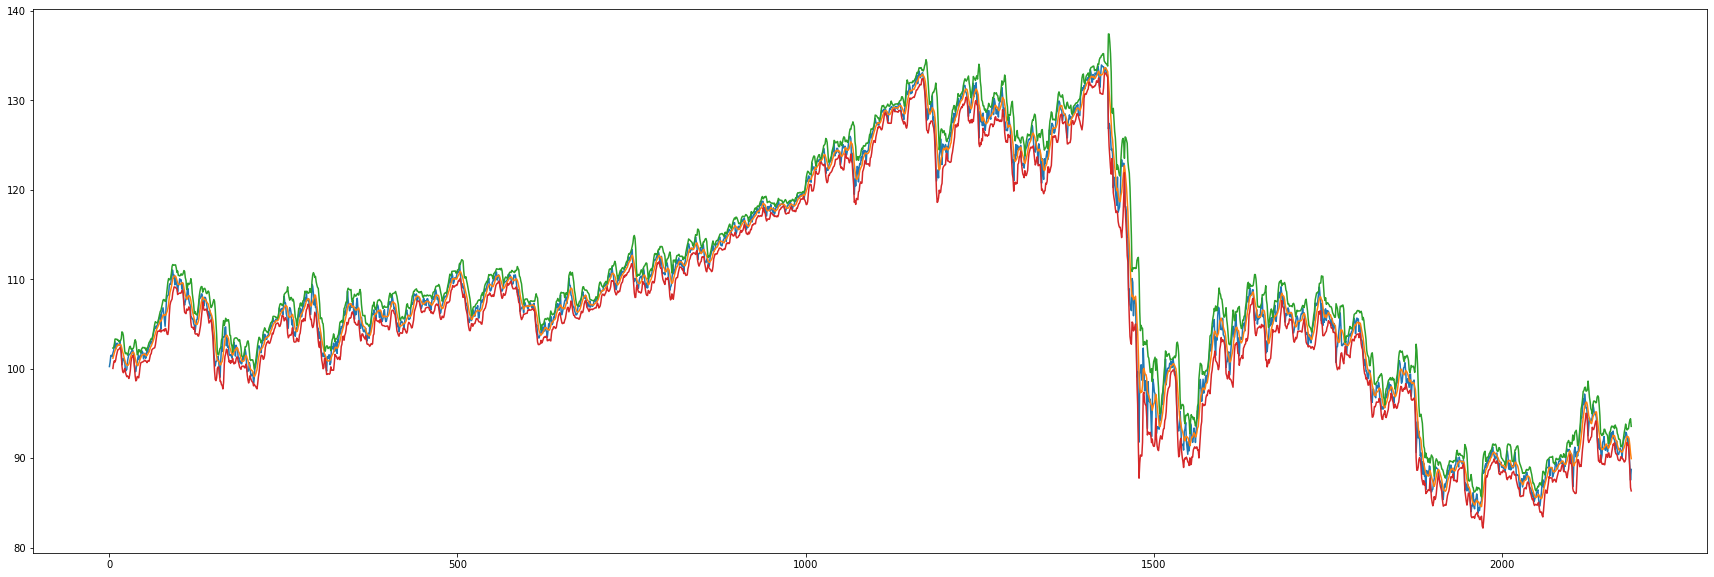

In [245]:
bband=df_train
drop = ['Date', 'High','Low', 'Open', 'SMA01', 'std',]
bband = df_train.drop(columns=drop,axis=1) 

fig = plt.subplots(figsize=(30,10))
# plt.title('Bollinger Band')
# plt.ylabel('USD/JPY')
plt.plot(bband)
# plt.legend()

In [246]:
df_train

,Date,High,Low,Open,Close,SMA01,mean,std,upper,lower
0,2003-01-23,100.416900,99.950797,100.314203,100.235198,100.235198,NaN,NaN,NaN,NaN
1,2003-01-24,100.930402,100.172002,100.251001,100.717098,100.421112,NaN,NaN,NaN,NaN
2,2003-01-27,101.862602,100.717098,100.796097,101.467602,100.607025,NaN,NaN,NaN,NaN
3,2003-01-28,101.688801,101.135803,101.483405,101.491301,100.792939,NaN,NaN,NaN,NaN
4,2003-01-29,101.609796,101.033100,101.483405,101.341199,100.978853,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2182,2011-07-07,92.264890,90.571922,92.174042,92.193787,92.369432,92.369432,0.456344,93.282120,91.456745
2183,2011-07-10,90.644598,88.792047,90.489759,90.492917,92.066336,92.066336,0.895320,93.856976,90.275695
2184,2011-07-11,89.125431,86.571360,89.072500,89.074079,91.429333,91.429333,1.402744,94.234820,88.623845
2185,2011-07-12,88.502120,87.532002,87.532002,87.530417,90.550984,90.550984,1.925143,94.401270,86.700698


In [247]:
# mean/std削除＋1日目を取り合えす終値で埋める
drop = ['mean', 'std',]
df_train = df_train.drop(columns=drop,axis=1) 
df_train['lower'][0]=df_train['Close'][0]
df_train['upper'][0]=df_train['Close'][0]

df_test = df_test.drop(columns=drop,axis=1) 
df_test['lower'][0]=df_test['Close'][0]
df_test['upper'][0]=df_test['Close'][0]

In [248]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [249]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-01-23  100.416900   99.950797  100.314203  100.235198  100.235198   
1    2003-01-24  100.930402  100.172002  100.251001  100.717098  100.421112   
2    2003-01-27  101.862602  100.717098  100.796097  101.467602  100.607025   
3    2003-01-28  101.688801  101.135803  101.483405  101.491301  100.792939   
4    2003-01-29  101.609796  101.033100  101.483405  101.341199  100.978853   
...         ...         ...         ...         ...         ...         ...   
2182 2011-07-07   92.264890   90.571922   92.174042   92.193787   92.369432   
2183 2011-07-10   90.644598   88.792047   90.489759   90.492917   92.066336   
2184 2011-07-11   89.125431   86.571360   89.072500   89.074079   91.429333   
2185 2011-07-12   88.502120   87.532002   87.532002   87.530417   90.550984   
2186 2011-07-13   89.185468   88.197968   88.693297   88.732800   89.942683   

           upper       lower  
0     100.2351

## 指数移動平滑平均(EMA)の追加

In [250]:
# # EMA関数
# def EMA(df,span):
#     df["EMA"] = df["Close"].ewm(span=span).mean()
#     return df

In [251]:
# EMAを計算する
# df_train = EMA(df_train,span01)
# df_test = EMA(df_test,span01)

In [252]:
df_train['EMA01']=df_train['Close'].ewm(span=span01, adjust=False).mean()
df_test['EMA01']=df_test['Close'].ewm(span=span01, adjust=False).mean()

# df_train['EMA02']=df_train['Close'].ewm(span=span02, adjust=False).mean()
# df_test['EMA02']=df_test['Close'].ewm(span=span02, adjust=False).mean()

# df_train['EMA03']=df_train['Close'].ewm(span=span03, adjust=False).mean()
# df_test['EMA03']=df_test['Close'].ewm(span=span03, adjust=False).mean()

In [253]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-01-23  100.416900   99.950797  100.314203  100.235198  100.235198   
1    2003-01-24  100.930402  100.172002  100.251001  100.717098  100.421112   
2    2003-01-27  101.862602  100.717098  100.796097  101.467602  100.607025   
3    2003-01-28  101.688801  101.135803  101.483405  101.491301  100.792939   
4    2003-01-29  101.609796  101.033100  101.483405  101.341199  100.978853   
...         ...         ...         ...         ...         ...         ...   
2182 2011-07-07   92.264890   90.571922   92.174042   92.193787   92.369432   
2183 2011-07-10   90.644598   88.792047   90.489759   90.492917   92.066336   
2184 2011-07-11   89.125431   86.571360   89.072500   89.074079   91.429333   
2185 2011-07-12   88.502120   87.532002   87.532002   87.530417   90.550984   
2186 2011-07-13   89.185468   88.197968   88.693297   88.732800   89.942683   

           upper       lower       EMA01  
0 

##　ピボットポイント

In [254]:
## PPをShiftしてるが使い方合ってるか不明
df_train['PP'] = ((df_train['High'].shift(1) + df_train['Low'].shift(1) + df_train['Close'].shift(1)) / 3)
df_train['R1'] = (2 * df_train['PP'] - df_train['Low'])
df_train['S1'] = (2 * df_train['PP'] - df_train['High'])
df_train['R2'] = (df_train['PP'] + df_train['High'] - df_train['Low'])
df_train['S2'] = (df_train['PP'] - df_train['High'] + df_train['Low'])
df_train['R3'] = (df_train['High'] + 2 * (df_train['PP'] -df_train['Low']))
df_train['S3'] = (df_train['Low'] - 2 * (df_train['High'] - df_train['PP']))

## PPをShiftしてるが使い方合ってるか不明
df_test['PP'] = ((df_test['High'].shift(1) + df_test['Low'].shift(1) + df_test['Close'].shift(1)) / 3)
df_test['R1'] = (2 * df_test['PP'] - df_test['Low'])
df_test['S1'] = (2 * df_test['PP'] - df_test['High'])
df_test['R2'] = (df_test['PP'] + df_test['High'] - df_test['Low'])
df_test['S2'] = (df_test['PP'] - df_train['High'] + df_test['Low'])
df_test['R3'] = (df_test['High'] + 2 * (df_test['PP'] -df_test['Low']))
df_test['S3'] = (df_test['Low'] - 2 * (df_test['High'] - df_test['PP']))

In [255]:
# df_train['Close'].shift(1)

In [256]:
# 1日目を取り合えす終値で埋める
df_train['PP'][0]=df_train['Close'][0]
df_train['R1'][0]=df_train['Close'][0]
df_train['S1'][0]=df_train['Close'][0]
df_train['R2'][0]=df_train['Close'][0]
df_train['S2'][0]=df_train['Close'][0]
df_train['R3'][0]=df_train['Close'][0]
df_train['S3'][0]=df_train['Close'][0]


df_test['PP'][0]=df_test['Close'][0]
df_test['R1'][0]=df_test['Close'][0]
df_test['S1'][0]=df_test['Close'][0]
df_test['R2'][0]=df_test['Close'][0]
df_test['S2'][0]=df_test['Close'][0]
df_test['R3'][0]=df_test['Close'][0]
df_test['S3'][0]=df_test['Close'][0]

In [257]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [258]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-01-23  100.416900   99.950797  100.314203  100.235198  100.235198   
1    2003-01-24  100.930402  100.172002  100.251001  100.717098  100.421112   
2    2003-01-27  101.862602  100.717098  100.796097  101.467602  100.607025   
3    2003-01-28  101.688801  101.135803  101.483405  101.491301  100.792939   
4    2003-01-29  101.609796  101.033100  101.483405  101.341199  100.978853   
...         ...         ...         ...         ...         ...         ...   
2182 2011-07-07   92.264890   90.571922   92.174042   92.193787   92.369432   
2183 2011-07-10   90.644598   88.792047   90.489759   90.492917   92.066336   
2184 2011-07-11   89.125431   86.571360   89.072500   89.074079   91.429333   
2185 2011-07-12   88.502120   87.532002   87.532002   87.530417   90.550984   
2186 2011-07-13   89.185468   88.197968   88.693297   88.732800   89.942683   

           upper       lower       EMA01     

## RSIの追加

In [259]:
# # RSI関数
# def RSI(df,span):
#     #　終値の差分
#     df_diff=df.diff()
    
#     # 値上幅と値下幅
#     df_up, df_down = df_diff.copy(), df_diff.copy()
#     df_up[df_up < 0] = 0
#     df_down[df_down > 0] = 0
#     df_down = df_down * -1
    
#     # 移動平均
#     up_sma_01 = df_up.rolling(window=span01, center=False).mean()
#     down_sma_01 = df_down.abs().rolling(window=span01, center=False).mean()

#     # RSI
#     df = up_sma_01 / (up_sma_01 + down_sma_01) * 100

#     return df

In [260]:
# df_train['RSI01']=RSI(df_train['Close'],span01)
# df_test['RSI01']=RSI(df_test['Close'],span01)

In [261]:
# df_train.to_csv('IdoHeikin.csv')

In [262]:
# # 結果
# print(f'train\n{df_train}\n')
# print(f'test\n{df_test}\n')

In [263]:
# #ブランクは取り敢えず50で埋める
# df_train['RSI01']=df_train['RSI01'].fillna(50)
# df_test['RSI01']=df_test['RSI01'].fillna(50)

In [264]:
# # 最初の行除外
# df_train=df_train[span01:]

In [265]:
# # 結果
# print(f'train\n{df_train}\n')
# print(f'test\n{df_test}\n')

In [266]:
#  df_train.to_csv('IdoHeikin.csv')

In [267]:
# del df_train['RSI01']
# del df_test['RSI01']

## MACEの追加

In [268]:
# # MACE関数
# def macd(df):
#     FastEMA_period = 12  # 短期EMAの期間
#     SlowEMA_period = 26  # 長期EMAの期間
# #     SignalSMA_period = 9  # SMAを取る期間
#     SignalSMA_period = span01  # SMAを取る期間
    
#     df["MACD"] = df["Close"].ewm(span=FastEMA_period).mean() - df["Close"].ewm(span=SlowEMA_period).mean()
#     df["Signal"] = df["MACD"].rolling(SignalSMA_period).mean()
#     return df

In [269]:
# # MACDを計算する
# df_train = macd(df_train)
# df_test = macd(df_test)

In [270]:
# df_train.head(20)

In [271]:
# df_test

In [272]:
# import mpl_finance as mpf
# # import mplfinance as mpf
# # import matplotlib.finance
# # from matplotlib.finance import candlestick_ohlc
 
# # チャート定義
# fig, ax = plt.subplots(2, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
 
# # ローソク足チャートをプロット
# mpl_finance.candlestick_ohlc(ax[0], df.values, width=0.5, colorup='r', colordown='b')
 
# # MACDをプロット
# ax[1].plot(df_train["index"], df_train["MACD"], label="MACD")
# ax[1].plot(df_train["index"], df_train["Signal"], label="Signal")
 
# # X軸を調整
# plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
# fig.autofmt_xdate()
 
# # 凡例表示, グリッド表示
# for a in ax:
#     a.legend()
#     a.grid()
 
# # グラフを表示
# plt.show()

## 特徴量調整用

In [273]:
# # mean/std削除＋1日目を取り合えす終値で埋める
drop = ['upper', 'lower', 'PP','R1','S1','R2','S2','R3','S3','SMA01']
# drop = ['upper', 'lower', 'PP','R1','S1','R2','S2','R3','S3']
# drop = ['upper', 'lower', 'SMA01']
df_train = df_train.drop(columns=drop,axis=1) 

df_test = df_test.drop(columns=drop,axis=1) 

In [274]:
# df_train=df_train[span01-1:]
# df_train

## 多項式特徴量/多項式回帰/交互作用特徴量

In [275]:
# EMAに多項式特徴量を適用してみる
# df_train["EMA"] = df_train["EMA"] **2
# df_test["EMA"] = df_test["EMA"] **2

##　配列の型などを調べるための関数

In [276]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

## Trainデータを学習用と検証用に分割
#### (train:2003/12/1-2011/12/14 →これを8:2に分割する| test:2011/12/15-2019/12/31)

In [277]:
# 不要
# Trainデータを学習用と検証用に分割
# 今回は①学習用：8割、②検証用：2割にTrainデータを分割して、①の予測モデルで
# ②が正しく評価できるのかを確認した上で、testデータへの予測モデルの適用を行う

In [278]:
# 不要
# train_test_splitというDataFrameを分けてくれる関数がsklearnにあるのでそれを使う
# from sklearn.model_selection import train_test_split

# df_train, df_validation = train_test_split(df_train, train_size=0.8, test_size=0.2, shuffle=False)

In [279]:
# 不要
# # 分割後のサイズ
# print(f'①学習用データのサイズ(df_train)：{len(df_train)}')
# print(f'②検証用データのサイズ(df_validation)：{len(df_validation)}')
# print(f'元々のdf_trainのサイズが8:2に分割された\n')

# # 分割後の詳細
# print(f'分割後のサマリ(df_train)\n{df_train.describe()}\n')
# print(f'分割後のサマリ(df_validation)\n{df_validation.describe()}\n')

## *Train/test/latestデータの縦結合(直接今回の課題とは関係なし)

In [280]:
# df_Merged=pd.concat([df_train,df_test,df_latest])
df_Merged = pd.DataFrame(np.concatenate([df_train.values, df_test.values, df_latest.values]), columns=df_train.columns)

NameError: name 'df_latest' is not defined

In [281]:
df_Merged

NameError: name 'df_Merged' is not defined

In [282]:
df_Merged.info()

NameError: name 'df_Merged' is not defined

##　LSTMモデルへ訓練させるための前処理

In [283]:
##　LSTMモデルへ訓練させるための前処理

In [284]:
# windowを設定
window_len=6
# window_len=6 #11/6の中間報告でのアドバイスを受け修正しようとしたが、後に出てくる未来予測のところでエラーが出るため一旦保留

In [285]:
# # Closeの単価だけ抽出
# df_train=df_train['Close']
# df_test=df_test['Close']
# df_latest=df_latest['Close']

In [286]:
# Dateそぎ落とし
# del df_train['High','Low','Open','Close']
# del df_test['High','Low','Open','Close']
# del df_latest['Date']

In [287]:
# Dateをインデックスに指定
df_train.set_index('Date',inplace=True)
df_test.set_index('Date',inplace=True)

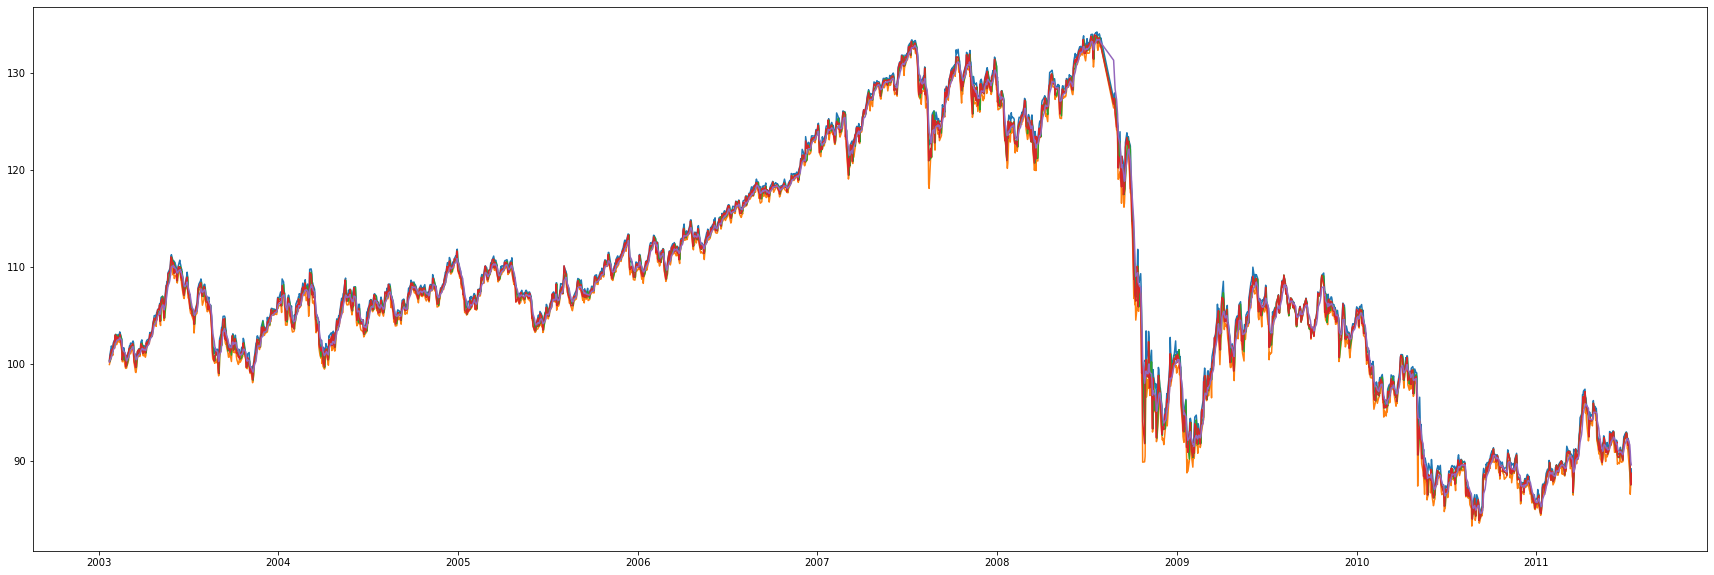

In [288]:
fig = plt.subplots(figsize=(30,10))
plt.plot(df_train)

In [289]:
# 分割後の詳細
print(f'単価抽出後のサマリ(df_train)\n{df_train.describe()}\n')
print(f'単価抽出後のサマリ(df_test)\n{df_test.describe()}\n')
# print(f'単価抽出後のサマリ(df_latest)\n{df_latest.describe()}\n')

単価抽出後のサマリ(df_train)
              High          Low         Open        Close        EMA01
count  2187.000000  2187.000000  2187.000000  2187.000000  2187.000000
mean    108.734330   107.610347   108.203299   108.204905   108.217054
std      12.233109    12.299644    12.259910    12.271763    12.216438
min      84.473121    83.287332    83.858501    83.856133    84.625069
25%     101.661148   100.460351   101.119997   101.143699   101.263002
50%     107.226697   106.286595   106.839604   106.823801   106.786779
75%     116.785701   116.031250   116.363049   116.402551   116.301408
max     134.251806   133.604796   133.868656   133.944502   133.479266

単価抽出後のサマリ(df_test)
              High          Low         Open        Close        EMA01
count  1314.000000  1314.000000  1314.000000  1314.000000  1314.000000
mean     98.975436    98.190527    98.601504    98.601355    98.586759
std       9.542734     9.561047     9.547183     9.547930     9.511910
min      76.054883    74.994700    75

In [290]:
df_train.head()

,High,Low,Open,Close,EMA01
Date,,,,,
2003-01-23,100.416900,99.950797,100.314203,100.235198,100.235198
2003-01-24,100.930402,100.172002,100.251001,100.717098,100.372884
2003-01-27,101.862602,100.717098,100.796097,101.467602,100.685660
2003-01-28,101.688801,101.135803,101.483405,101.491301,100.915843
2003-01-29,101.609796,101.033100,101.483405,101.341199,101.037374


In [291]:
# LSTMへの入力用に処理の関数
def data_maker(data):
#   ArrayAmt= len(data) - window_len+1 if len(data) % 2 == 0 else len(data) - window_len

  data_lstm_in=[]
  if len(data)==window_len:
    temp = data[:window_len].copy()
    temp = temp / temp.iloc[0] - 1
    data_lstm_in.append(temp)
  for i in range(len(data) - window_len): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)    
#   for i in range(ArrayAmt): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
      temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
      temp = temp / temp.iloc[0] - 1
      data_lstm_in.append(temp)
  return data_lstm_in

In [292]:
num=3

In [293]:
x = '偶数' if num % 2 == 0 else '奇数'
x

'奇数'

In [294]:
y = len(df_train) - window_len+1 if len(df_train) % 2 == 0 else len(df_train) - window_len
y

2181

In [295]:
p = len(df_test) - window_len+1 if len(df_test) % 2 == 0 else len(df_test) - window_len
p

1309

In [296]:
#関数の実行(Trainデータ)
train_lstm_in = data_maker(df_train)

In [297]:
# 配列抜粋
print(f'train_lstm_in_配列数 : {len(train_lstm_in)}\n')
print(f'train_lstm_in[0]\n{train_lstm_in[0]}\n')
print(f'train_lstm_in[1]\n{train_lstm_in[1]}\n')
print(f'train_lstm_in[-1]\n{train_lstm_in[-1]}\n')

train_lstm_in_配列数 : 2181

train_lstm_in[0]
                High       Low      Open     Close     EMA01
Date                                                        
2003-01-23  0.000000  0.000000  0.000000  0.000000  0.000000
2003-01-24  0.005114  0.002213 -0.000630  0.004808  0.001374
2003-01-27  0.014397  0.007667  0.004804  0.012295  0.004494
2003-01-28  0.012666  0.011856  0.011655  0.012532  0.006790
2003-01-29  0.011879  0.010828  0.011655  0.011034  0.008003
2003-01-30  0.013846  0.009485  0.009923  0.014975  0.009995

train_lstm_in[1]
                High       Low      Open     Close     EMA01
Date                                                        
2003-01-24  0.000000  0.000000  0.000000  0.000000  0.000000
2003-01-27  0.009236  0.005442  0.005437  0.007452  0.003116
2003-01-28  0.007514  0.009621  0.012293  0.007687  0.005409
2003-01-29  0.006731  0.008596  0.012293  0.006197  0.006620
2003-01-30  0.008688  0.007256  0.010560  0.010118  0.008609
2003-01-31  0.012602  0.

In [298]:
lstm_train_out = (df_train['Close'][window_len:].values / df_train['Close'][:-window_len].values)-1

In [299]:
len(lstm_train_out)

2181

In [300]:
lstm_train_out

array([ 0.01757569,  0.0179622 ,  0.01518216, ..., -0.04114293,
       -0.05678949, -0.03950746])

In [301]:
#関数の実行(Testデータ)
test_lstm_in = data_maker(df_test)

In [302]:
# 配列抜粋(Testデータ)
print(f'test_lstm_in_配列数 : {len(test_lstm_in)}\n')
print(f'test_lstm_in[0]\n{test_lstm_in[0]}\n')
print(f'test_lstm_in[1]\n{test_lstm_in[1]}\n')
print(f'test_lstm_in[-1]\n{test_lstm_in[-1]}\n')

test_lstm_in_配列数 : 1308

test_lstm_in[0]
                High       Low      Open     Close     EMA01
Date                                                        
2011-07-14  0.000000  0.000000  0.000000  0.000000  0.000000
2011-07-17 -0.005493 -0.006339 -0.003302 -0.003212 -0.000918
2011-07-18 -0.000178 -0.002002 -0.004747 -0.004907 -0.002057
2011-07-19  0.000071  0.002397  0.000785  0.000446 -0.001342
2011-07-20  0.007238  0.001230  0.002677  0.002632 -0.000207
2011-07-21  0.010889  0.007874  0.010101  0.010527  0.002860

test_lstm_in[1]
                High       Low      Open     Close     EMA01
Date                                                        
2011-07-17  0.000000  0.000000  0.000000  0.000000  0.000000
2011-07-18  0.005345  0.004364 -0.001450 -0.001701 -0.001141
2011-07-19  0.005595  0.008792  0.004100  0.003670 -0.000425
2011-07-20  0.012802  0.007617  0.005998  0.005862  0.000712
2011-07-21  0.016473  0.014304  0.013447  0.013783  0.003781
2011-07-28 -0.001522 -0.002

In [303]:
lstm_test_out = (df_test['Close'][window_len:].values / df_test['Close'][:-window_len].values)-1

In [304]:
lstm_test_out

array([-0.00578994, -0.0074018 , -0.0093509 , ..., -0.00574429,
        0.00577681, -0.00037698])

In [305]:
len(lstm_test_out)

1308

In [306]:
# #関数の実行(Latestデータ)
# latest_lstm_in = data_maker(df_latest)

In [307]:
# # 配列抜粋
# print(f'latest_lstm_in_配列数 : {len(latest_lstm_in)}\n')
# print(f'latest_lstm_in\n{latest_lstm_in[0]}\n')
# #print(f'latest_lstm_in\n{latest_lstm_in[1]}\n')
# # print(f'latest_lstm_in\n{latest_lstm_in[-1]}\n')

## Numpy配列への変換

In [308]:
# PandasのデータフレームからNumpy配列へ変換。リスト内包表記という記法がここでは使われている。
train_lstm_in = [np.array(train_lstm_input) for train_lstm_input in train_lstm_in]
train_lstm_in = np.array(train_lstm_in)

test_lstm_in = [np.array(test_lstm_input) for test_lstm_input in test_lstm_in]
test_lstm_in = np.array(test_lstm_in)

In [309]:
# # 11/6 latestデータのnumpyへの置き換え
# latest_lstm_in = [np.array(test_lstm_input) for test_lstm_input in latest_lstm_in]
# latest_lstm_in = np.array(latest_lstm_in)

In [310]:
print(f'train_lstm_in.shape[0] : {train_lstm_in.shape[0]}')
print(f'train_lstm_in.shape[1] : {train_lstm_in.shape[1]}')
print(f'train_lstm_in.shape[2] : {train_lstm_in.shape[2]}')

train_lstm_in.shape[0] : 2181
train_lstm_in.shape[1] : 6
train_lstm_in.shape[2] : 5


In [311]:
train_lstm_in

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 5.11369304e-03,  2.21313955e-03, -6.30034879e-04,
          4.80769722e-03,  1.37362778e-03],
        [ 1.43969933e-02,  7.66678190e-03,  4.80385072e-03,
          1.22951231e-02,  4.49405502e-03],
        [ 1.26661994e-02,  1.18558937e-02,  1.16554049e-02,
          1.25315574e-02,  6.79048427e-03],
        [ 1.18794312e-02,  1.08283495e-02,  1.16554049e-02,
          1.10340602e-02,  8.00293453e-03],
        [ 1.38462316e-02,  9.48470289e-03,  9.92283905e-03,
          1.49747917e-02,  9.99489371e-03]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 9.23606986e-03,  5.44159933e-03,  5.43731130e-03,
          7.45160086e-03,  3.11614682e-03],
        [ 7.51408163e-03,  9.62146050e-03,  1.22931849e-02,
          7.68690386e-03,  5.40942595e-03],
        [ 6.73131627e-03,  8.59618542e-03,  1.22931849e-02,
  

## モデルの定義

In [312]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [313]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

## データの学習と予測

In [314]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(train_lstm_in, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(train_lstm_in, lstm_train_out, 
                            epochs=90, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/90
2181/2181 - 4s - loss: 0.0089
Epoch 2/90
2181/2181 - 3s - loss: 0.0075
Epoch 3/90
2181/2181 - 3s - loss: 0.0071
Epoch 4/90
2181/2181 - 3s - loss: 0.0069
Epoch 5/90
2181/2181 - 3s - loss: 0.0068
Epoch 6/90
2181/2181 - 3s - loss: 0.0068
Epoch 7/90
2181/2181 - 3s - loss: 0.0069
Epoch 8/90
2181/2181 - 3s - loss: 0.0067
Epoch 9/90
2181/2181 - 3s - loss: 0.0067
Epoch 10/90
2181/2181 - 3s - loss: 0.0068
Epoch 11/90
2181/2181 - 3s - loss: 0.0066
Epoch 12/90
2181/2181 - 3s - loss: 0.0067
Epoch 13/90
2181/2181 - 3s - loss: 0.0066
Epoch 14/90
2181/2181 - 3s - loss: 0.0066
Epoch 15/90
2181/2181 - 3s - loss: 0.0066
Epoch 16/90
2181/2181 - 3s - loss: 0.0065
Epoch 17/90
2181/2181 - 3s - loss: 0.0066
Epoch 18/90
2181/2181 - 3s - loss: 0.0065
Epoch 19/90
2181/2181 - 3s - loss: 0.0065
Epoch 20/90
2181/2181 - 3s - loss: 0.0065
Epoch 21/90
2181/2181 - 3s - loss: 0.0065
Epoch 22/90
2181/2181 - 3s - loss: 0.0066
Epoch 23/90
2181/2181 - 3s - loss: 0.0065
Epoch 24/90
2181/2181 - 3s - loss: 0.0066
E

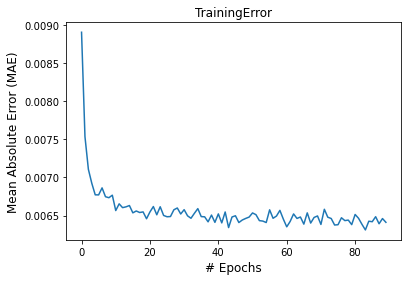

In [315]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [316]:
#作成したモデルを使用し予測。
train_pred = yen_model.predict(train_lstm_in)
# test_pred = yen_model.predict(X_test)

In [317]:
train_pred

array([[ 0.01624336],
       [ 0.0149439 ],
       [ 0.0104713 ],
       ...,
       [-0.02886325],
       [-0.04398816],
       [-0.0454516 ]], dtype=float32)

In [318]:
np.transpose(train_pred)

array([[ 0.01624336,  0.0149439 ,  0.0104713 , ..., -0.02886325,
        -0.04398816, -0.0454516 ]], dtype=float32)

In [319]:
len(train_pred)

2181

In [320]:
lstm_train_out

array([ 0.01757569,  0.0179622 ,  0.01518216, ..., -0.04114293,
       -0.05678949, -0.03950746])

In [321]:
len(lstm_train_out)

2181

In [322]:
# yen_model.score(train_pred, lstm_train_out) 

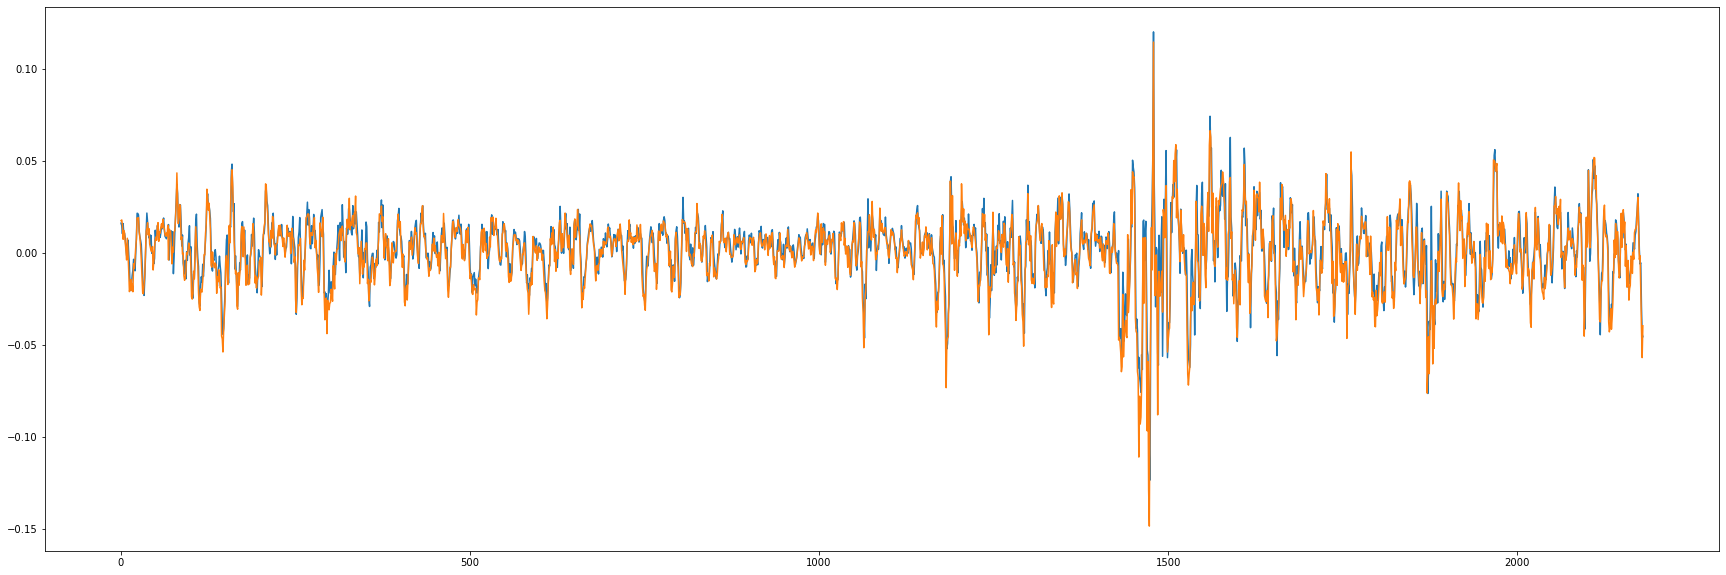

In [323]:
fig,ax = plt.subplots(figsize=(30,10))
# plt.plot(train_pred)

ax.plot(train_pred)
ax.plot(lstm_train_out)
plt.show()

In [324]:
# 配列には変化量が入っているので１００倍
np.transpose(train_pred+1)

array([[1.0162433 , 1.0149438 , 1.0104713 , ..., 0.97113675, 0.95601183,
        0.9545484 ]], dtype=float32)

In [325]:
#予測データ(変化量)を単価に直したもの
Pred_Train_Price_Array=(np.transpose(train_pred+1)* df_train['Close'].values[:-window_len])[0]
(np.transpose(train_pred+1)* df_train['Close'].values[:-window_len])[0]

array([101.86335209, 102.22219833, 102.53010409, ...,  90.21481372,
        88.71838689,  88.18366657])

In [326]:
#正解データ(変化量)を単価に直したもの
Actual_Train_Price_Array=(1+lstm_train_out)* df_train['Close'].values[:-window_len]
(1+lstm_train_out)* df_train['Close'].values[:-window_len]

array([101.99690048, 102.52619904, 103.00809952, ...,  89.07407913,
        87.53041725,  88.73279976])

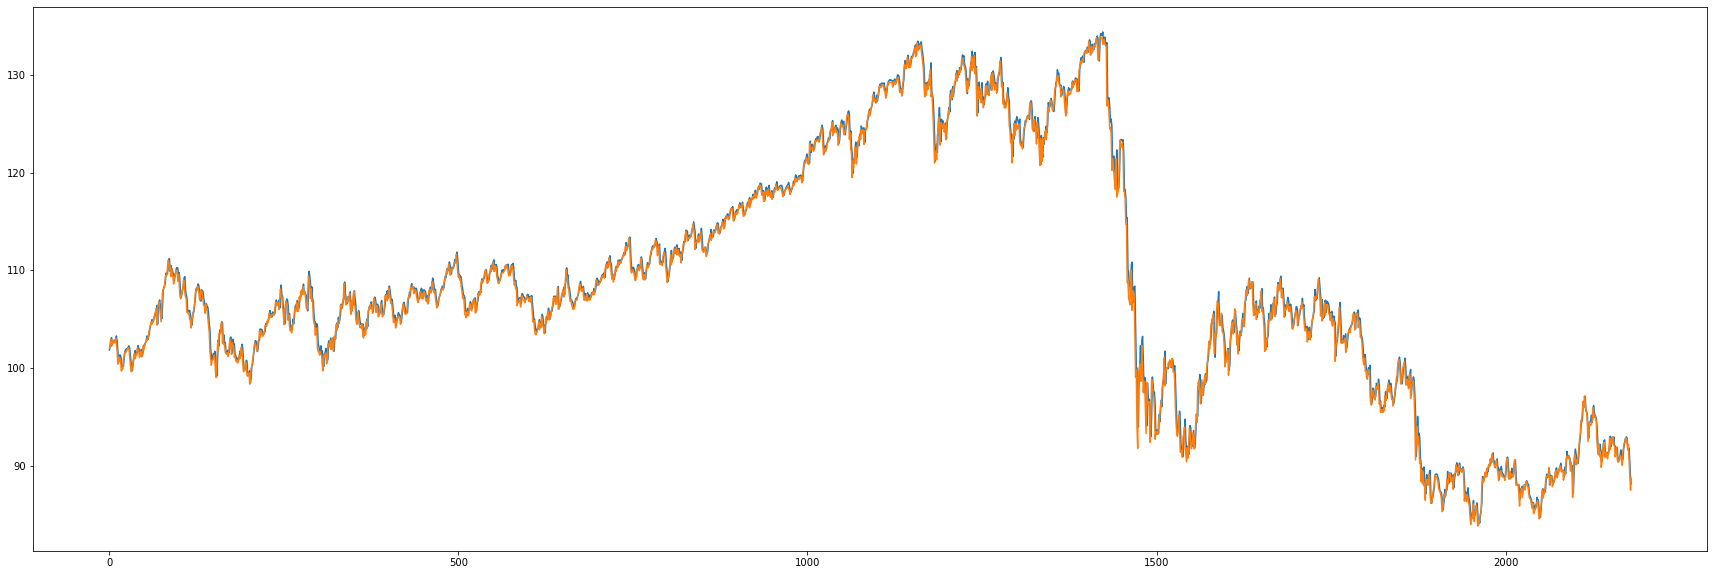

In [327]:
fig,ax = plt.subplots(figsize=(30,10))

# 予測データと正解データの併記
ax.plot(Pred_Train_Price_Array)
ax.plot(Actual_Train_Price_Array)
plt.show()

## テストデータへの転用

In [328]:
#作成したモデルを使用し予測。
test_pred = yen_model.predict(test_lstm_in)

In [329]:
test_pred

array([[ 0.0130026 ],
       [-0.00242793],
       [-0.00580772],
       ...,
       [-0.00653894],
       [ 0.00180767],
       [ 0.00325062]], dtype=float32)

In [330]:
len(test_pred)

1308

In [331]:
np.transpose(test_pred)

array([[ 0.0130026 , -0.00242793, -0.00580772, ..., -0.00653894,
         0.00180767,  0.00325062]], dtype=float32)

In [332]:
len(lstm_test_out)

1308

In [333]:
# 予測データ(変化量)を単価に直したもの
Pred_Price_Array=(np.transpose(test_pred+1)* df_test['Close'].values[:-window_len])[0]
(np.transpose(test_pred+1)* df_test['Close'].values[:-window_len])[0]

array([89.70249462, 88.05239678, 87.60484614, ..., 96.05037222,
       96.31204833, 96.72182764])

In [334]:
typeInfo(Pred_Price_Array)

Pred_Price_Array は ndarray型
Pred_Price_Array の行数, 列数・・・(1308,)



In [335]:
# 正解データ(変化量)を単価に直したもの
Actual_Price_Array=(1+lstm_test_out)* df_test['Close'].values[:-window_len]
(1+lstm_test_out)* df_test['Close'].values[:-window_len]

array([88.03839149, 87.6133699 , 87.2926313 , ..., 96.12720024,
       96.69363251, 96.37209831])

In [336]:
typeInfo(Actual_Price_Array)

Actual_Price_Array は ndarray型
Actual_Price_Array の行数, 列数・・・(1308,)



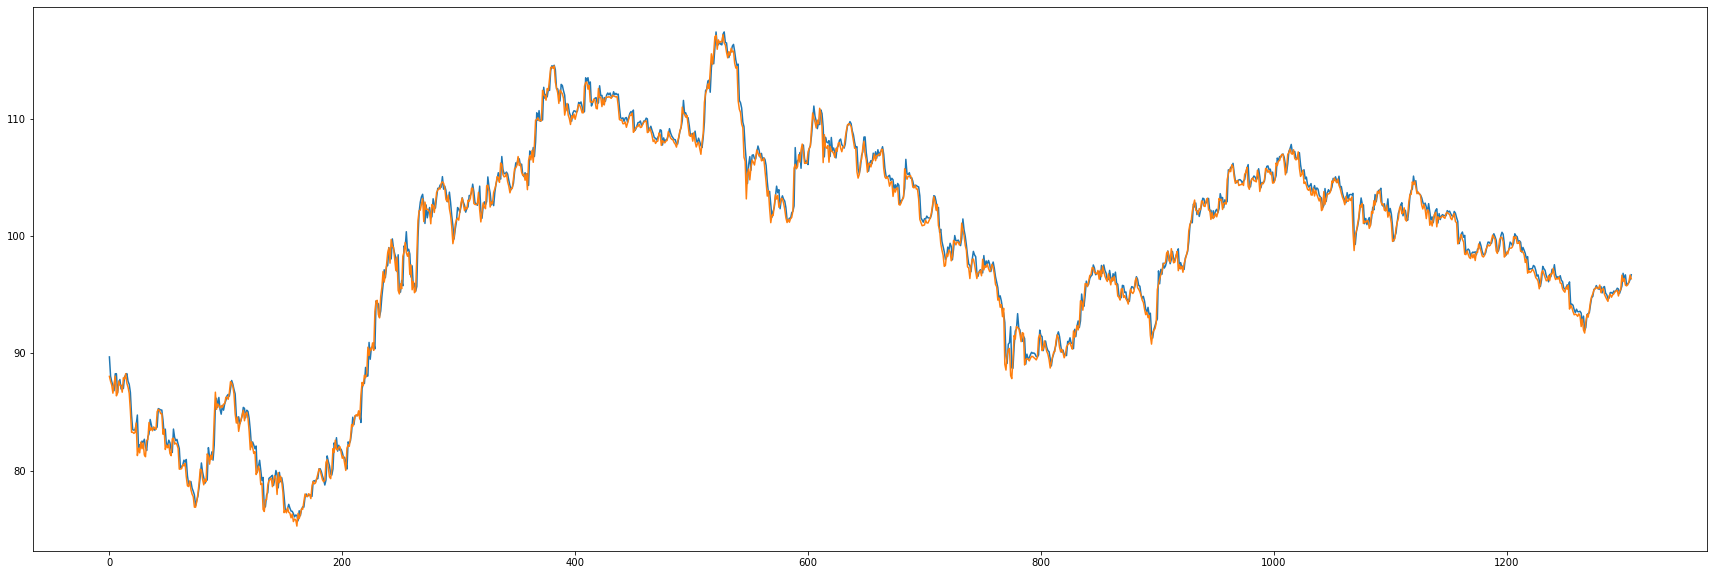

In [337]:
fig,ax = plt.subplots(figsize=(30,10))
# fig,ax = plt.subplots()

# 正解データと予測データの併記
ax.plot(Pred_Price_Array)
ax.plot(Actual_Price_Array)
plt.show()

In [338]:
# Actual_Price_Array[::12]

In [339]:
len(Pred_Price_Array)

1308

In [340]:
Pred_Price_Array_7=Pred_Price_Array[::6]
Pred_Price_Array_7

array([ 89.70249462,  88.26955423,  87.00302544,  86.6771105 ,
        84.74025033,  82.67141576,  83.89951172,  85.29066919,
        83.5358936 ,  81.54408885,  81.88671638,  80.94093301,
        78.23064266,  79.47346993,  79.18562578,  82.14957614,
        84.81118079,  86.50087049,  86.54025639,  84.6763856 ,
        84.46218951,  82.09274276,  79.4079444 ,  79.40830828,
        79.64353907,  77.8280231 ,  76.54144926,  75.70277558,
        77.7173371 ,  77.79187799,  80.12913764,  79.18121894,
        80.14055519,  81.71955029,  80.12076955,  83.91431021,
        84.10167293,  88.07916213,  90.38752263,  94.84901733,
        99.0435633 ,  98.16634265,  95.77131894,  98.49173872,
        95.71964621, 102.77650654, 101.55872558, 104.10678917,
       104.2923885 , 101.76276711, 102.31946308, 102.06735503,
       104.45953253, 104.28970619, 102.96774093, 102.62514821,
       104.88886292, 105.32729132, 105.52394   , 106.16925125,
       104.35187294, 108.04888532, 109.94022579, 112.46

In [341]:
len(Pred_Price_Array_7)

218

In [342]:
Df_Pred_Array = pd.Series(Pred_Price_Array_7)
Df_Pred_Array

0      89.702495
1      88.269554
2      87.003025
3      86.677110
4      84.740250
         ...    
213    95.601643
214    95.716084
215    95.201209
216    95.499366
217    96.712092
Length: 218, dtype: float64

In [343]:
Df_Pred_Array.describe()

count    218.000000
mean      98.870792
std        9.536956
min       75.702776
25%       93.873286
50%      101.345047
75%      105.639614
max      117.463000
dtype: float64

In [344]:
df_submit[1]=Df_Pred_Array
df_submit

,Date,1
0,2011-07-24,89.702495
1,2011-08-07,88.269554
2,2011-08-21,87.003025
3,2011-09-04,86.677110
4,2011-09-18,84.740250
...,...,...
214,2019-11-06,95.716084
215,2019-11-20,95.201209
216,2019-12-04,95.499366
217,2019-12-18,96.712092


In [345]:
#線形補間
df_submit=df_submit.interpolate()

In [346]:
df_submit = df_submit.set_index("Date") #indexにDateを指定する。

In [347]:
# 指定の様式（インデックスはDate、カラム名は「y」のみ）をお守りください。
df_submit = df_submit.rename(columns={1: 'y'}) #カラム名「1」を「y」に変更する。
df_submit.to_csv('y_submit.csv') #投稿するファイルを書き出す。
df_submit #投稿する中身を確認する。

,y
Date,
2011-07-24,89.702495
2011-08-07,88.269554
2011-08-21,87.003025
2011-09-04,86.677110
2011-09-18,84.740250
...,...
2019-11-06,95.716084
2019-11-20,95.201209
2019-12-04,95.499366


In [1013]:
##　参考

In [1011]:
df_test_Close_array=df_test['Close'].values
df_test_Close_array

array([88.55109711, 88.26670265, 88.11660072, ..., 96.12720024,
       96.69363251, 96.37209831])

In [1012]:
df_test_Close_array6=df_test_Close_array[5::6]
df_test_Close_array6

array([ 89.48329735,  88.06999222,  86.68986092,  86.59190048,
        84.05125778,  82.36540169,  83.42399879,  85.02769783,
        83.48720024,  81.26730217,  81.89140289,  80.61160072,
        77.97853058,  78.92021164,  79.03950241,  81.74445923,
        85.34369904,  86.24983154,  86.53344246,  84.32617744,
        84.46285072,  81.60700241,  78.89413788,  79.11850121,
        79.30730995,  78.15706894,  76.36377159,  75.25303299,
        77.36470024,  77.60170265,  79.69519783,  79.1706427 ,
        80.09336212,  82.00200241,  80.00804077,  83.76133034,
        84.40201797,  88.27459831,  90.26540169,  94.88295265,
        98.61016846,  98.05559174,  95.52916725,  98.64730217,
        95.35458275, 103.20875778, 102.0585228 , 103.75623444,
       104.54148499, 101.81678299, 101.56161453, 102.19677521,
       104.11093643, 103.7593927 , 102.36820145, 102.78690048,
       104.61337769, 105.38047424, 104.92858932, 106.18943588,
       103.9884874 , 107.82393402, 109.85739807, 112.48